
<h1 align=center><font size=5>Car prices - 3</font></h1>

<p>Dans cette section, nous développerons plusieurs modèles qui prédiront le prix de la voiture en utilisant les caractéristiques. Ceci n'est qu'une estimation mais ça devrait nous donner une idée objective du coût de la voiture.</p>

In [132]:
import pandas as pd #dans la 3e partie on repars de final pour lancer des regressions linéaires dessus
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Récupérer le jeu de données issu de l'analyse précédente

In [197]:
path="cars_final.csv"
df = pd.read_csv(path, index_col=0)
df

,length,width,curb-weight,engine-size,horsepower,city-L/100km,highway-L/100km,wheel-base,bore,price,...,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,drive-wheels_fwd,drive-wheels_rwd
0,-0.439616,-0.855008,2548,130,111,11.190476,8.703704,88.6,3.47,16500.0,...,0,0,0,0,0,0,0,0,0,1
1,-0.245239,-0.189262,2823,152,154,12.368421,9.038462,94.5,2.68,16500.0,...,0,0,0,0,0,0,0,0,0,1
2,0.192109,0.143611,2337,109,102,9.791667,7.833333,99.8,3.19,13950.0,...,0,0,0,0,0,0,0,0,1,0
3,0.192109,0.238717,2824,136,115,13.055556,10.681818,99.4,3.19,17450.0,...,0,0,0,0,0,0,0,0,0,0
4,0.248803,0.191164,2507,136,110,12.368421,9.400000,99.8,3.19,15250.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.180193,1.427549,2952,141,114,10.217391,8.392857,109.1,3.78,16845.0,...,0,0,0,0,0,0,0,1,0,1
196,1.180193,1.379996,3049,141,160,12.368421,9.400000,109.1,3.78,19045.0,...,0,0,0,0,0,0,0,1,0,1
197,1.180193,1.427549,3012,173,134,13.055556,10.217391,109.1,3.58,21485.0,...,0,0,0,0,0,0,0,1,0,1
198,1.180193,1.427549,3217,145,106,9.038462,8.703704,109.1,3.01,22470.0,...,0,0,0,0,0,0,0,1,0,1


<h3>1. Régression linéaire univariée</h3>

<h4>Chargement du module</h4>

In [134]:
from sklearn.linear_model import LinearRegression

<h4>Instance de l'objet</h4>

In [135]:
lm = LinearRegression()
lm

LinearRegression()

<h4>Prédiction du prix à partir de la colonne highway-L/100km </h4>

In [136]:
X = df[['highway-L/100km']]
Y = df['price']

Entraînement du modèle :

In [137]:
lm.fit(X,Y)

LinearRegression()

Test de prédiction sur quelque lignes : 

In [138]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([15496.76826929, 16655.24161063, 12484.73758181, 22342.29255902,
       17906.39281928])

<h4>Valeur de l'intercept : b ?</h4>

In [139]:
lm.intercept_

-14623.53860550239

<h4>Valeur de la pente : a ?</h4>

In [140]:
lm.coef_

array([3460.63100264])

<h3>Modèle d'estimation obtenu :</h3>

$$
Yhat = a + b  X
$$

<b>price</b> = 3458.685X - 14617.843 *<b>highway-L/100km</b>

 ### Visualisation

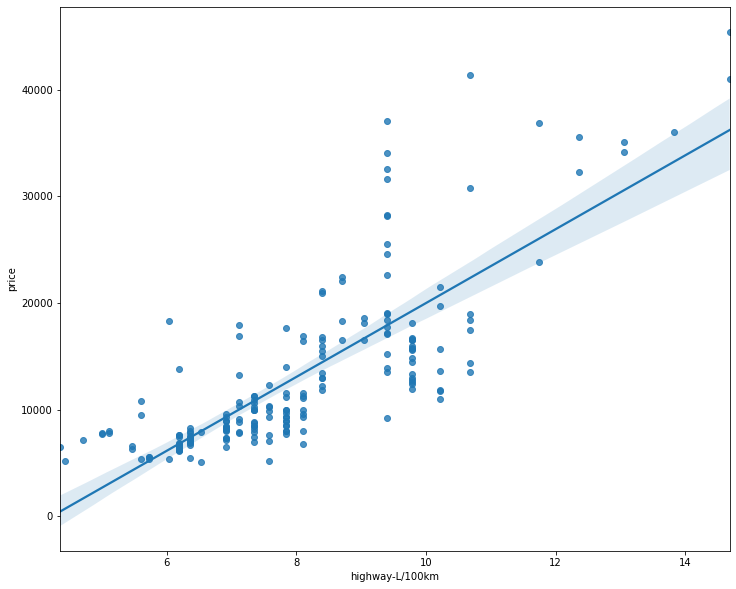

In [141]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-L/100km", y="price", data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


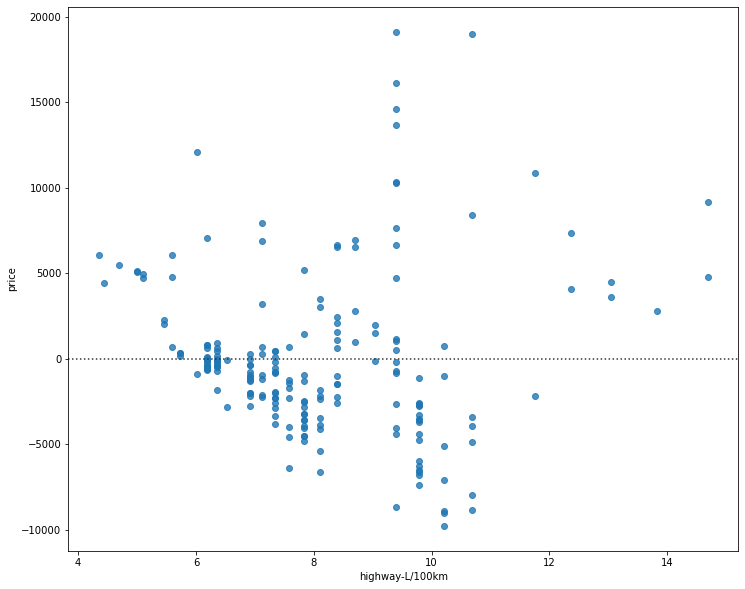

In [142]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-L/100km'], df['price'])#resideplot va mesurer la répartition des points autour de l'horizontale ce qui semble indiquer que la relation n'est pas linéaire mais plutot courbée il faudrait aller chercher des valeurs x² x3 (polynomial) etc..
plt.show()

Le nuage de points n'est pas uniformément réparti autour de l'horizontale, ce qui semble indiquer une régression autre que linéaire.

## Régression linéaire multivariée

In [143]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
Z.head()

,horsepower,curb-weight,engine-size,highway-L/100km
0,111,2548,130,8.703704
1,154,2823,152,9.038462
2,102,2337,109,7.833333
3,115,2824,136,10.681818
4,110,2507,136,9.400000


Entraînement du modèle.

In [144]:
lm.fit(Z, df['price'])

LinearRegression()

Valeur de l'intercept a0 ?

In [145]:
lm.intercept_

-14383.748929849842

Valeurs des coefficients ?

In [146]:
lm.coef_

array([ 36.62425112,   3.4945574 ,  85.37910132, 502.57298307])

Modèle obtenu : 

$$
Yhat = a_0 + a_1 X_1 + a_2 X_2 + a_3 X_3 + a_4 X_4
$$

<b>Price</b> = -56827.2228887837 + 36.6377371 x <b>horsepower</b> + 3.5008215 x <b>curb-weight</b> + 85.37370862 x <b>engine-size</b> + 500.51979785 x <b>highway-mpg</b>

<h3>Evaluation et Visualisation</h3>

In [147]:
Y_hat = lm.predict(Z)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


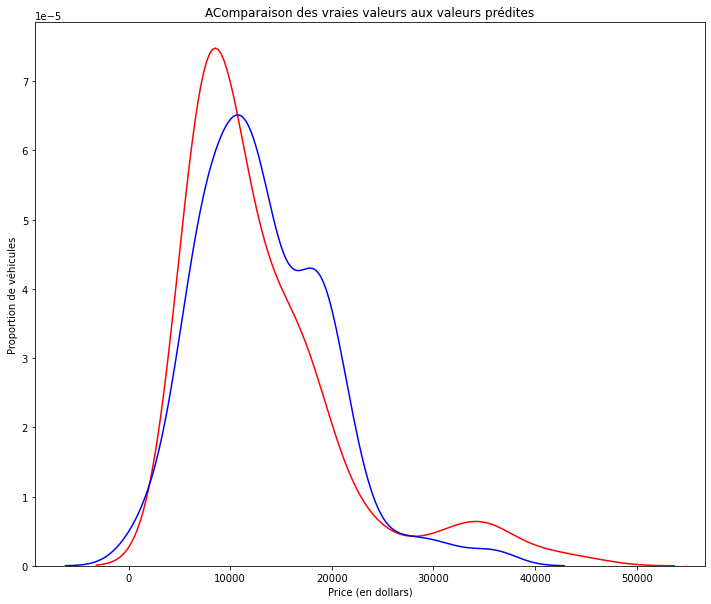

In [148]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Vraie valeur")
sns.distplot(Yhat, hist=False, color="b", label="Valeur estimée" , ax=ax1)


plt.title('AComparaison des vraies valeurs aux valeurs prédites')
plt.xlabel('Price (en dollars)')
plt.ylabel('Proportion de véhicules')

plt.show()
plt.close()

<p>C'est relativement proche. Mais une amélioration est possible.</p>

<h2>Régression Polynomiale et Pipelines</h2>

In [149]:
x = df['highway-L/100km']
x.max()

14.6875

In [150]:
def PlotPolly(model, x, y, Name):
    x_new = np.linspace(x.min(), x.max(), 100)
    y_new = model(x_new)

    plt.plot(x, y, '.', x_new, y_new, '-')
    plt.title('Modélisation polynomiale : Price ~ highway-L/100km')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price')

    plt.show()
    plt.close()

lets get the variables

In [151]:
x = df['highway-L/100km']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [152]:
# degré 3
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-23.38 x + 922.1 x - 7064 x + 2.145e+04


 Let's plot the function 

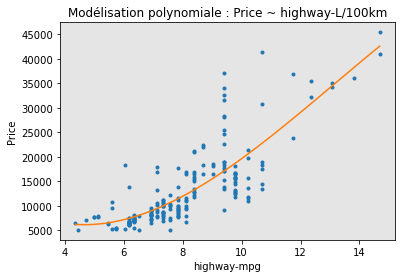

In [153]:
PlotPolly(p, x, y, 'highway-mpg')

In [154]:
np.polyfit(x, y, 3) #on est au degré 3 le highway a été transformé en 3 colones, on a ici une amélioration de la courbe en la rendant 'tordue'

array([  -23.37611329,   922.12919775, -7063.83725212, 21445.20344533])

<p>C'est déja mieux qu'une droite !</p>

### Plus compliqué

Pour la régression multivariée la modélisation nécessite la création de pseudo-variables appelées PolynomialFeatures qui sont des produits croisés et des puissances des varaibles originales.

In [155]:
from sklearn.preprocessing import PolynomialFeatures

Degré 2: 

In [156]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [157]:
Z_pr=pr.fit_transform(Z)

Dimension des données :

In [158]:
Z.shape

(200, 4)

Après transformation :

In [159]:
Z_pr.shape #le shape passe de 4 à 15. 

(200, 15)

<h2>Pipeline</h2>

<p>Une manière de somplifier le procédé :</p>

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #pipeline qui doit transformer réduire et mettre en route un modele polynomial pour ensuite le tester

Le pipeline est créé à partir d'une **liste** de **tuple** donnant dans l'ordre les opérations à effectuer.

In [161]:
Input=[('Reduction',StandardScaler()), ('polynomiale', PolynomialFeatures(include_bias=False)), ('Modele',LinearRegression())]

Le pipeline est instancié

In [162]:
pipe=Pipeline(Input)
pipe
# il faut trouver jusqu'a quand baisser le RMSE 
# un pipe line st une série d'action qui s'enchaine les unes apres les autres mais qui ont une correllation entre elles

Pipeline(steps=[('Reduction', StandardScaler()),
                ('polynomiale', PolynomialFeatures(include_bias=False)),
                ('Modele', LinearRegression())])

On peut alors lancer les trois opérations : 

In [163]:
pipe.fit(Z,y)

Pipeline(steps=[('Reduction', StandardScaler()),
                ('polynomiale', PolynomialFeatures(include_bias=False)),
                ('Modele', LinearRegression())])

 On peut alors lancer la prédiction :

In [164]:
ypipe=pipe.predict(Z)
ypipe[0:4] #4 pour degrés de x- x² x3 x4 etc.. / le fit est un entrainement qui ne rend rien

array([12372.48273904, 18414.55052179,  9964.23368315, 17532.62591913])

<h2>Mesures</h2>

<h3>Régression linéaire simple</h3>

Calcul de R^2

In [165]:
#highway_L/100km
lm.fit(X, Y)
#  R^2
print('Le R-square est: ', lm.score(X, Y))

Le R-square est:  0.6421025471527544


On peut dire que  ~ 64.179% de la variation du prix est expliqué par cette caractéristique.

Calcul de la MSE

In [166]:
Yhat=lm.predict(X)

In [167]:
from sklearn.metrics import mean_squared_error

In [168]:
mse = mean_squared_error(df['price'], Yhat)
print('MSE : ', mse)

MSE :  22603173.623282965


<h3>Régression linéaire multiple</h3>

Calcul de R^2

In [169]:
# modèlisation
lm.fit(Z, df['price'])
# R^2
print('Le R-square est: ', lm.score(Z, df['price']))

Le R-square est:  0.8118353385939377


 ~ 80.896 % ode la variation du prix est expliqué par ce modèle "multi_fit".

Calcul de la MSE

In [170]:
Y_predict_multifit = lm.predict(Z)

In [171]:
print('MSE : ', \
      mean_squared_error(df['price'], Y_predict_multifit))
# c'est lelinéaire multiple qui marche le mieux ici car c'est le nombre le moins élevé comparé aux 2 autres

MSE :  11883623.305200644


<h3>Modèle polynomial</h3>

Calcul de R^2

La méthode est légèrement différente : 

In [172]:
from sklearn.metrics import r2_score

In [173]:
r_2 = r2_score(y, p(x))
print('Le R-square est: ', r_2)

Le R-square est:  0.6754211963161393


~ 67.419 % de la variation du prix sera expliquée par ce modèle.

<h3>MSE</h3>

In [174]:
mean_squared_error(df['price'], p(x))

20498919.441136904

<h2>Conclusion</h2>
Le modèle ayant le R-squared le plus élevé et la plus basse MSE est le meilleur pour ce jeu de données.

<h3>And the winner is : </h3>

In [175]:
# c'est la régréssion linéaire multiple qui est ici la plus probante, elle affiche le résultat le moins élevé
# il y a d'autres modeles de regression et parfois le benchmarking peut etre tres long pour déterminer la meilleure méthode a adopter pour trouver le meilleur modele prédictif


In [176]:
df2 = df
df2 = df2.drop('price',axis = 1)
df2

,length,width,curb-weight,engine-size,horsepower,city-L/100km,highway-L/100km,wheel-base,bore,make_audi,...,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,drive-wheels_fwd,drive-wheels_rwd
0,-0.439616,-0.855008,2548,130,111,11.190476,8.703704,88.6,3.47,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.245239,-0.189262,2823,152,154,12.368421,9.038462,94.5,2.68,0,...,0,0,0,0,0,0,0,0,0,1
2,0.192109,0.143611,2337,109,102,9.791667,7.833333,99.8,3.19,1,...,0,0,0,0,0,0,0,0,1,0
3,0.192109,0.238717,2824,136,115,13.055556,10.681818,99.4,3.19,1,...,0,0,0,0,0,0,0,0,0,0
4,0.248803,0.191164,2507,136,110,12.368421,9.400000,99.8,3.19,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.180193,1.427549,2952,141,114,10.217391,8.392857,109.1,3.78,0,...,0,0,0,0,0,0,0,1,0,1
196,1.180193,1.379996,3049,141,160,12.368421,9.400000,109.1,3.78,0,...,0,0,0,0,0,0,0,1,0,1
197,1.180193,1.427549,3012,173,134,13.055556,10.217391,109.1,3.58,0,...,0,0,0,0,0,0,0,1,0,1
198,1.180193,1.427549,3217,145,106,9.038462,8.703704,109.1,3.01,0,...,0,0,0,0,0,0,0,1,0,1


In [177]:
df.columns

Index(['length', 'width', 'curb-weight', 'engine-size', 'horsepower',
       'city-L/100km', 'highway-L/100km', 'wheel-base', 'bore', 'price',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_renault', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [185]:
# essais avec DECISION TREE REGRESSOR

from sklearn.model_selection import train_test_split
X = df2.iloc[:,:]
y = df['price']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.4,random_state=1)


<hr>
Copyright &copy; 2020 Hatem & Driss @NEEDEMAND

In [186]:
#instanciation de l'arbre
from sklearn.tree import DecisionTreeRegressor
arbreregress = DecisionTreeRegressor(criterion='mse',
splitter='best',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
min_weight_fraction_leaf=0.0,
max_features=None,
random_state=None,
max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_impurity_split=None,
presort='deprecated',
ccp_alpha=0.0)

In [187]:
arbreregress.fit(X_train,y_train)

DecisionTreeRegressor()

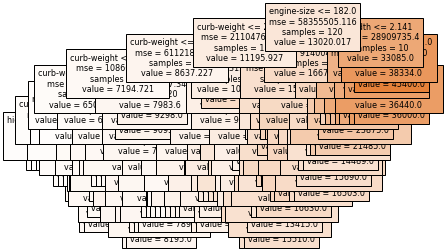

In [188]:
from sklearn import tree
tree.plot_tree(arbreregress,feature_names = list(df.columns[:-1]),filled=True, fontsize=8)
plt.show()

In [190]:
#importance des variables
impVarFirst={"Variable":df.columns[:-1],"Importance":arbreregress.feature_importances_}
print(pd.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False))

              Variable  Importance
3          engine-size    0.636676
2          curb-weight    0.260767
1                width    0.042108
7           wheel-base    0.016252
4           horsepower    0.014295
10           make_audi    0.011599
8                 bore    0.004616
6      highway-L/100km    0.003445
30          make_volvo    0.002828
5         city-L/100km    0.001988
9                price    0.001394
16         make_jaguar    0.001119
21         make_nissan    0.000770
26           make_saab    0.000553
0               length    0.000472
29     make_volkswagen    0.000329
31    drive-wheels_fwd    0.000260
13          make_dodge    0.000210
20     make_mitsubishi    0.000133
27         make_subaru    0.000095
28         make_toyota    0.000090
14          make_honda    0.000003
25        make_renault    0.000000
11            make_bmw    0.000000
12      make_chevrolet    0.000000
15          make_isuzu    0.000000
24        make_porsche    0.000000
22         make_peug

In [194]:
#prédiction sur l'échantillon test arbre
pred = arbreregress.predict(X_test)
pred

array([ 9720. ,  9095. ,  7150.5, 15690. ,  8195. , 16845. ,  9549. ,
        9895. ,  5389. ,  9988. ,  9988. ,  6649. , 20970. ,  7799. ,
       17950. ,  9258. ,  9298. ,  9095. ,  7898. , 11245. , 11845. ,
        6377. , 32250. ,  7799. ,  7129. ,  9639. ,  8845. ,  5399. ,
       19699. , 14869. ,  5195. , 17669. , 19699. ,  9258. , 15690. ,
       13499. , 16503. ,  7129. , 45400. , 10698. , 17950. , 16630. ,
       13415. , 30760. ,  9720. ,  6377. ,  6649. ,  9959. ,  8195. ,
       32528. , 13499. , 32528. ,  8921. , 11845. ,  7099. ,  9258. ,
        8195. , 17950. , 16845. , 10198. ,  6229. , 45400. , 14869. ,
       15985. ,  6377. , 18920. , 12170. , 16695. ,  5195. , 45400. ,
       11845. ,  9279. ,  9279. ,  9298. , 17669. , 21485. , 15690. ,
        7099. ,  7799. , 17199. ])